In [6]:
%run chillscript.py

In [7]:
%matplotlib inline

In [8]:
eachsong = pd.DataFrame.from_csv('/home/tejaswik/Documents/CurrentProjects/chills/eachSong.csv')

In [4]:
len(eachsong)

153

In [14]:
'''mean Energy and Mean RMS for each song'''

meanEn = []
meanRMS = []

for i in range(0,152,1):
    filename = fil+'songs/'+eachSong['folder'][i]+'/'+eachSong['song'][i]+'.mp3'
    meanEn.append(calcEn(filename)['meanEn'])
    meanRMS.append(calcEn(filename)['meanRMS'])

In [ ]:
'''load finalchills dataset instead of creating'''


wb = openpyxl.load_workbook(filename = fil+'finalchills.xlsx')
sheets = wb.get_sheet_names()
name = sheets[0]
sheet_ranges = wb[name]
df = pd.DataFrame(sheet_ranges.values)
df.columns = ['id','participant','song','start','end']

In [9]:
'''rmse before and after samples'''

chips = os.listdir('/home/tejaswik/Documents/CurrentProjects/chills/random/')
befores  = []
afters = []
for i in range(len(chips)):
    filename = fil+'/random/'+chips[i]
    befores.append(ratioCalc(filename)['before'])
    afters.append(ratioCalc(filename)['after'])

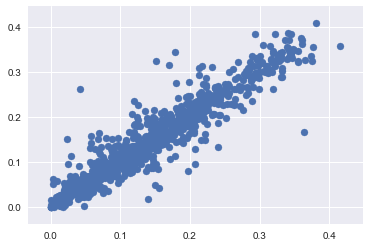

In [10]:
plt.scatter(befores,afters)

In [11]:
y = np.polyfit(befores,afters,befores[i], rcond=None, full=False, w =None, cov=False)
y

array([ 0.14113537])

In [15]:
# for i in range(len(befores)):
import scipy
import numpy as np

print(np.mean(meanEn),np.mean(meanRMS))
print(np.std(meanEn),np.std(meanRMS))
print(max(meanEn),max(meanRMS))
print(min(meanEn),min(meanRMS))


(32.2811798995209, 0.14280924)
(30.25706776040132, 0.080587812)
(129.71726860317585, 0.34723336)
(0.19315015797290491, 0.012319678)


152

In [12]:
from scipy.stats import ttest_rel
ttest_rel(befores,afters)



Ttest_relResult(statistic=-3.6711840891235479, pvalue=0.00025555079974231751)

In [21]:
chips = os.listdir('/home/tejaswik/Documents/CurrentProjects/chills/chop/chips/')
befores  = []
afters = []
for i in range(len(chips)):
    filename = fil+'/chop/chips/'+chips[i]
    befores.append(ratioCalc(filename)['before'])
    afters.append(ratioCalc(filename)['after'])

In [22]:
ttest_rel(befores,afters)


Ttest_relResult(statistic=-2.7212714298479592, pvalue=0.006594370960784233)

In [ ]:
'''onset density before and after samples'''

chips = os.listdir('/home/tejaswik/Documents/CurrentProjects/chills/chop/chips/')
beforeon  = []
afteron = []
for i in range(len(chips)):
    filename = fil+'/chop/chips/'+chips[i]
    beforeon.append(onsetDense(filename)['before'])
    afteron.append(onsetDense(filename)['after'])

In [ ]:
rat = []
for i in range(len(afteron)):
    if afteron[i]==0:
        continue
    else:
        rat.append(beforeon[i]/afteron[i])

print(np.mean(rat))

plt.plot(rat)